In [1]:
import utils.training as train
import utils.constants as c
import utils.preprocessing as pp
import utils.evaluation as eval
import utils.visualization as vis
import utils.tools as tls
import utils.transfer_learning as tl
import utils.models as m

In [64]:
import importlib

importlib.reload(train)
importlib.reload(c)
importlib.reload(pp)
importlib.reload(eval)
importlib.reload(vis)
importlib.reload(tls)
importlib.reload(tl)
importlib.reload(m)

<module 'utils.models' from 'd:\\FERI\\transfer-learning\\src\\utils\\models.py'>

## Transfer learning across markets - Pakistan

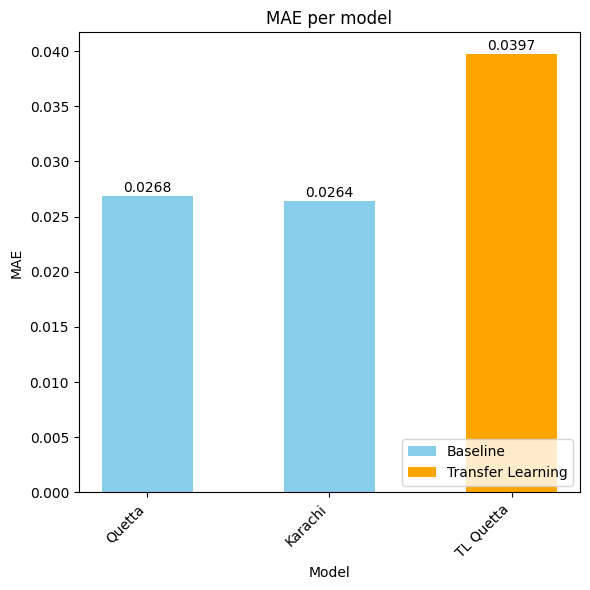

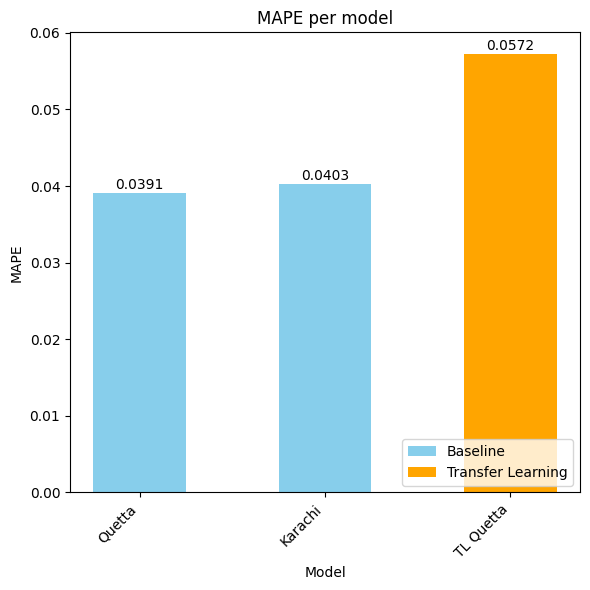

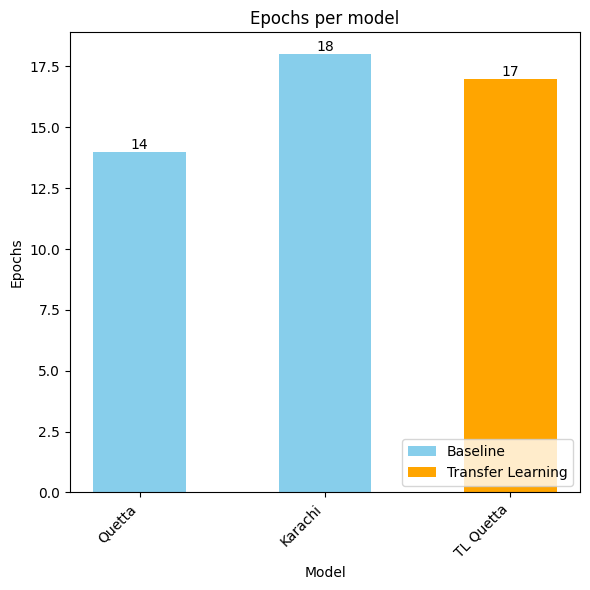

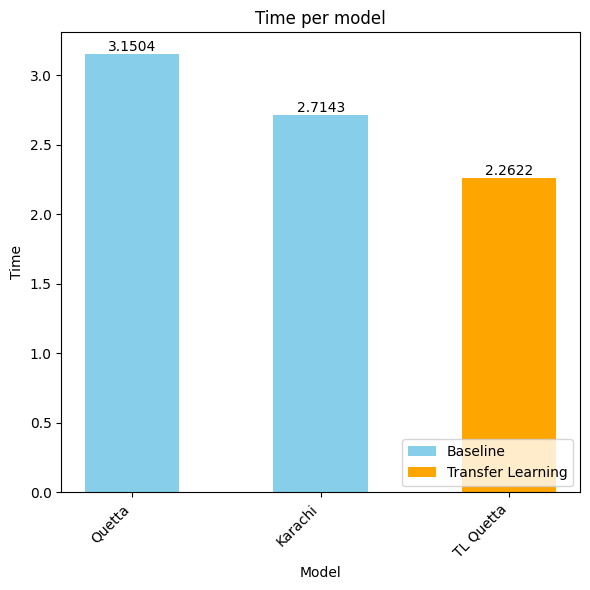

In [68]:
commodity = "Rice"
markets = ["Quetta", "Karachi", "TL Quetta"]

vis.plot_bar_from_array(
    tls.get_models_eval_metric("mae", c.get_market_results())
    + tls.get_models_eval_metric("mae", c.get_market_tl_results()),
    markets,
    "MAE per model",
    "Model",
    "MAE",
    bar_width=0.5,
    figsize=(6, 6),
    split_index=2,
    legend_titles=["Baseline", "Transfer Learning"],
    
)

vis.plot_bar_from_array(
    tls.get_models_eval_metric("mape", c.get_market_results())
    + tls.get_models_eval_metric("mape", c.get_market_tl_results()),
    markets,
    "MAPE per model",
    "Model",
    "MAPE",
    bar_width=0.5,
    figsize=(6, 6),
    split_index=2,
    legend_titles=["Baseline", "Transfer Learning"],
)


vis.plot_bar_from_array(
    tls.get_models_eval_metric("epochs", c.get_market_results())
    + tls.get_models_eval_metric("epochs", c.get_market_tl_results()),
    markets,
    "Epochs per model",
    "Model",
    "Epochs",
    bar_width=0.5,
    figsize=(6, 6),
    split_index=2,
    legend_titles=["Baseline", "Transfer Learning"],
)

vis.plot_bar_from_array(
    tls.get_models_eval_metric("elapsed_time", c.get_market_results())
    + tls.get_models_eval_metric("elapsed_time", c.get_market_tl_results()),
    markets,
    "Time per model",
    "Model",
    "Time",
    bar_width=0.5,
    figsize=(6, 6),
    split_index=2,
    legend_titles=["Baseline", "Transfer Learning"],
)

{'index': 3, 'column': 0, 'title': 'Prediction plot of market model (Quetta)', 'data': '../data/processed/Market-Quetta.csv', 'model': '../models/Market-Quetta-best-model.h5', 'scaler': '../scalers/Quetta-Rice-StandardScaler.pkl'}
2/2 [==============================] - 0s 3ms/step
0 0
{'index': 4, 'column': 1, 'title': 'Prediction plot of market model (Karachi)', 'data': '../data/processed/Market-Karachi.csv', 'model': '../models/Market-Karachi-best-model.h5', 'scaler': '../scalers/Karachi-Rice-StandardScaler.pkl'}
2/2 [==============================] - 0s 3ms/step
0 1
{'index': 5, 'column': 2, 'title': 'Prediction plot of transfer learning model (Quetta)', 'data': '../data/processed/Market-Karachi.csv', 'model': '../models/Quetta-Karachi-Rice.h5', 'scaler': '../scalers/Karachi-Rice-StandardScaler.pkl'}
2/2 [==============================] - 0s 4ms/step
0 2


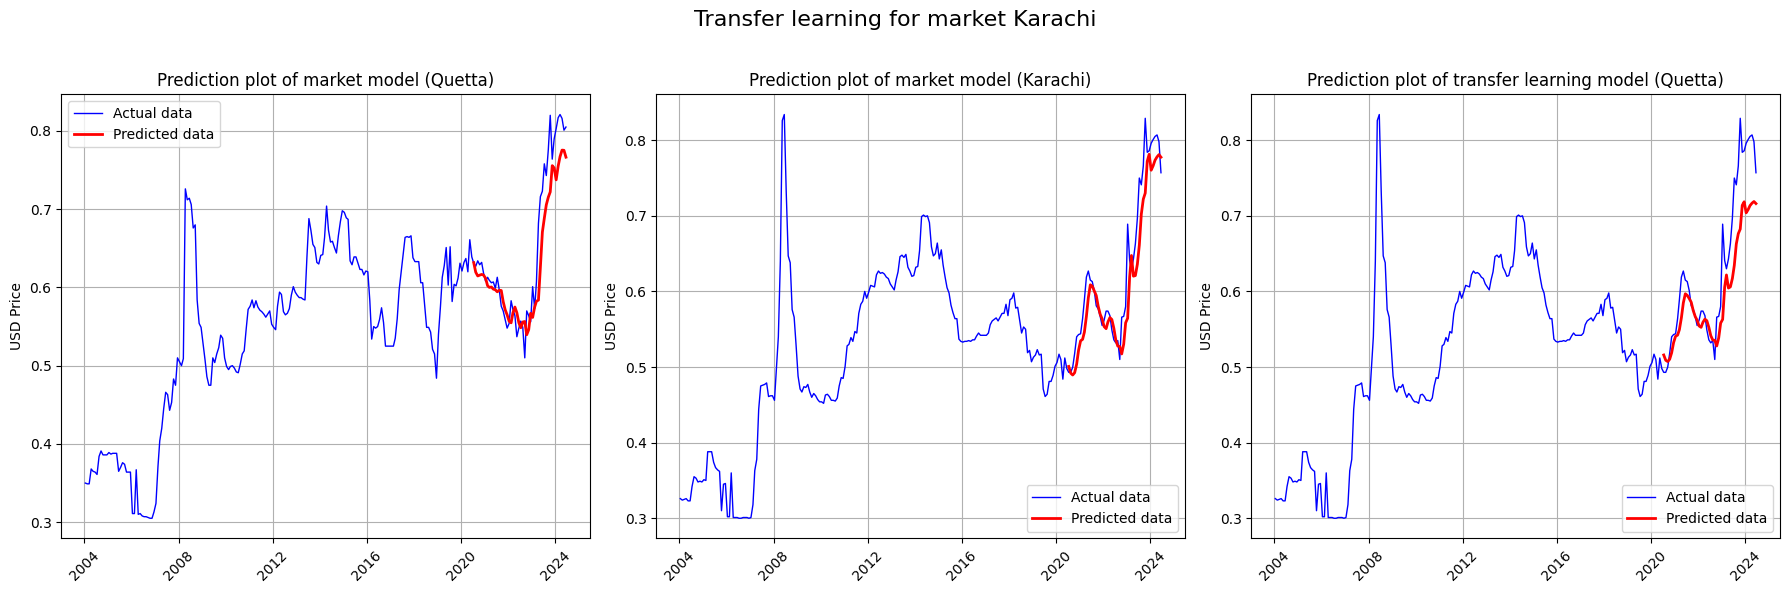

In [66]:
vis.visualize_tl_summary(
    "Karachi", ["Quetta"], commodity, "Transfer learning for market Karachi", market=True
)

## Transfer learning across countries

In [3]:
commodity = 'Rice'

large_datasets = ["Bangladesh", "India", "Indonesia", "Pakistan", "Tajikistan"]
small_datasets = ["Afghanistan", "Lao"]

# Pretrained models on larger datasets

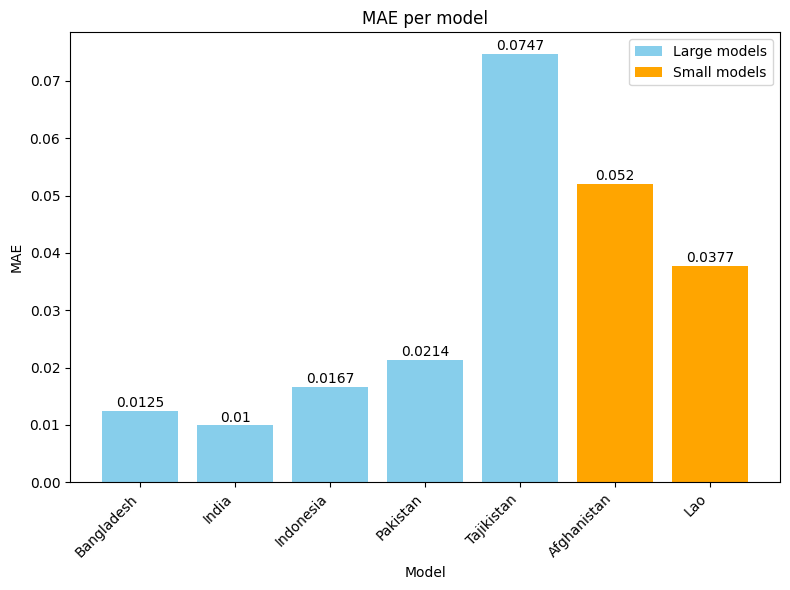

In [47]:
vis.plot_bar_from_array(
    tls.get_models_eval_metric("mae", c.get_large_model_results())
    + tls.get_models_eval_metric("mae", c.get_small_model_results()),
    large_datasets + small_datasets,
    "MAE per model",
    "Model",
    "MAE",
    split_index=5
)

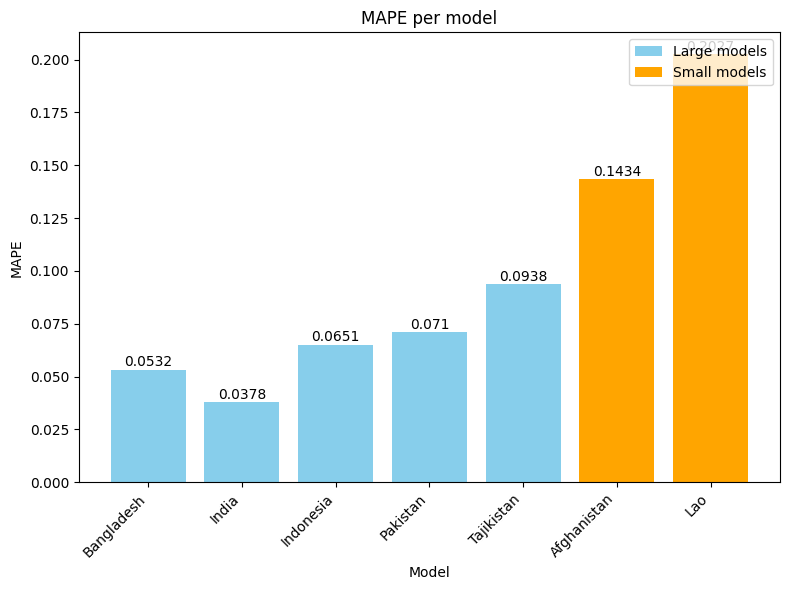

In [48]:
vis.plot_bar_from_array(
    tls.get_models_eval_metric("mape", c.get_large_model_results())
    + tls.get_models_eval_metric("mape", c.get_small_model_results()),
    large_datasets + small_datasets,
    "MAPE per model",
    "Model",
    "MAPE",
    split_index=5,
)

2/2 [==============================] - 0s 2ms/step


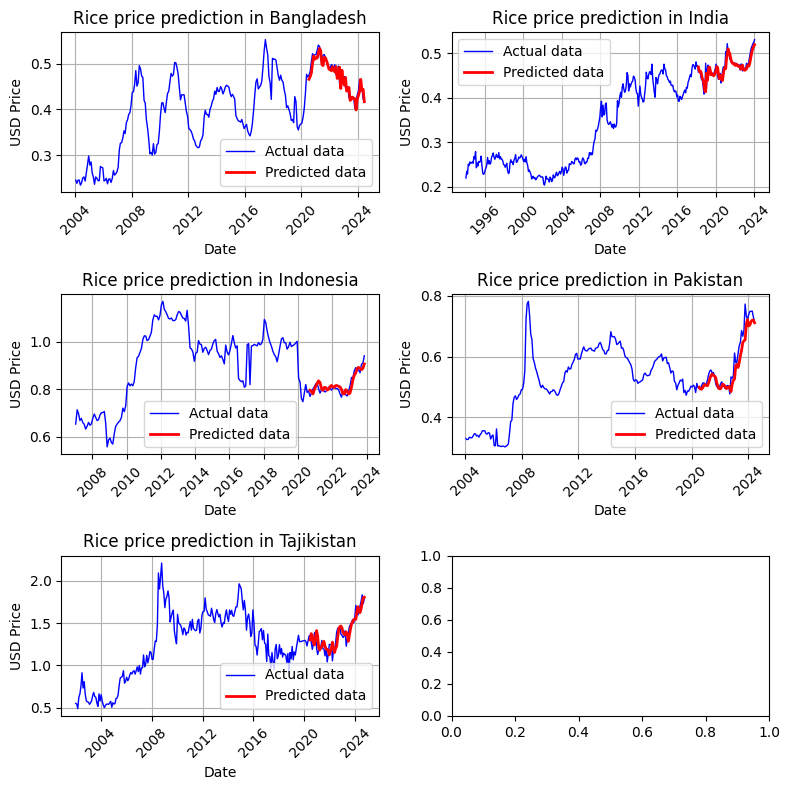

In [12]:
vis.plot_evaluations(large_datasets, commodity, c.get_large_model_results(), figsize=(8, 8))

1/1 [==============================] - 0s 172ms/step


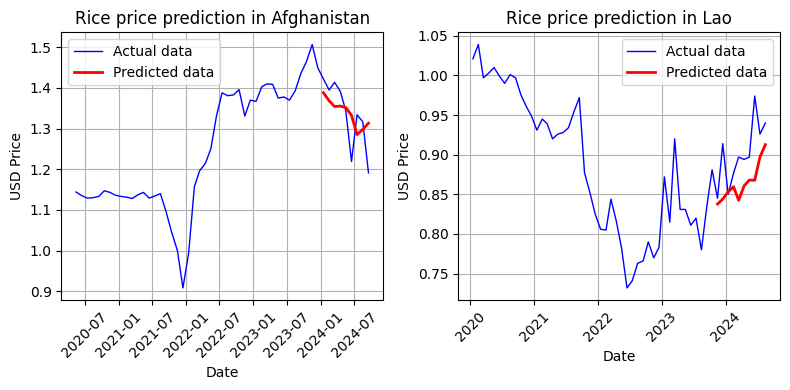

In [30]:
vis.plot_evaluations(
    small_datasets, commodity, c.get_small_model_results(), figsize=(8, 4)
)

# TL Summary Afghanistan

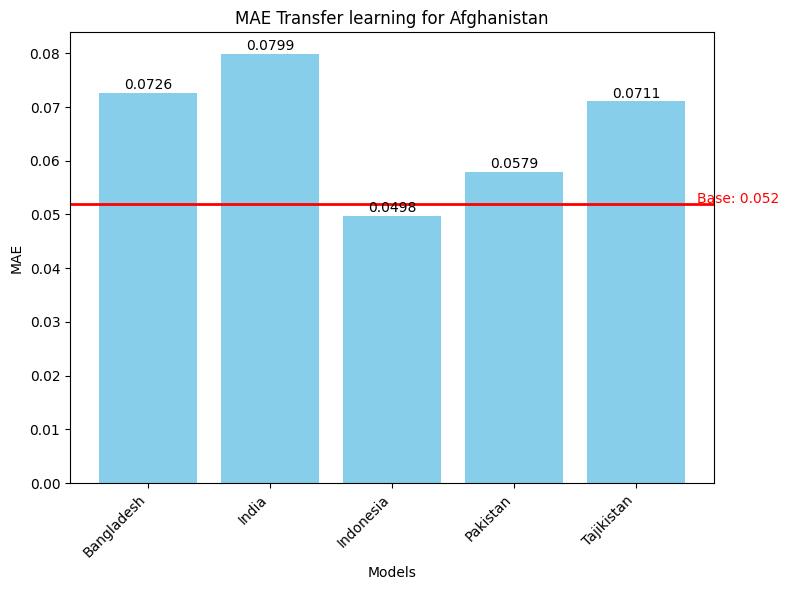

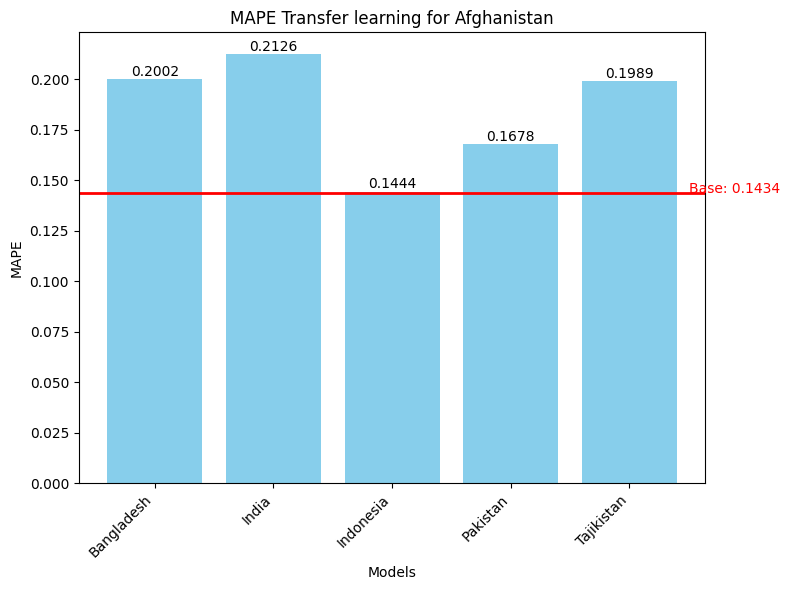

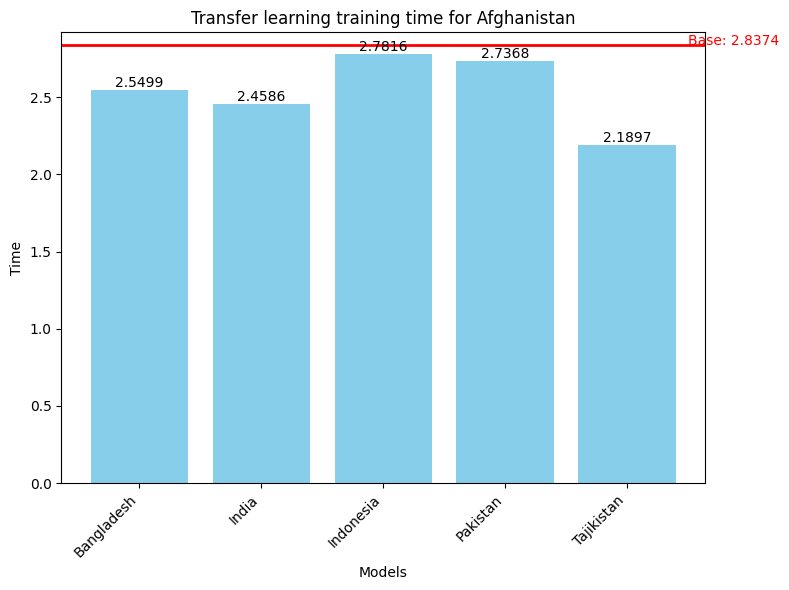

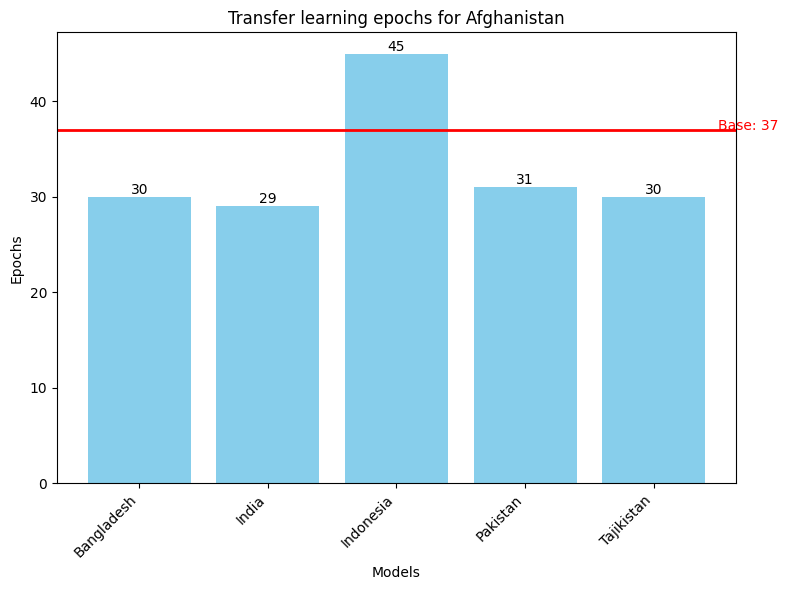

In [55]:
result = tls.get_result(c.get_small_model_results(), 'Afghanistan', commodity)
vis.plot_bar_from_array(
    tls.get_tl_metrics("mae", c.get_tl_model_results(), "Afghanistan"),
    large_datasets,
    "MAE Transfer learning for Afghanistan",
    "Models",
    "MAE",
    round(result["evaluation"]["mae"], 4),
)


result = tls.get_result(c.get_small_model_results(), "Afghanistan", commodity)
vis.plot_bar_from_array(
    tls.get_tl_metrics("mape", c.get_tl_model_results(), "Afghanistan"),
    large_datasets,
    "MAPE Transfer learning for Afghanistan",
    "Models",
    "MAPE",
    round(result["evaluation"]["mape"], 4),
)


vis.plot_bar_from_array(
    tls.get_tl_metrics("elapsed_time", c.get_tl_model_results(), "Afghanistan"),
    large_datasets,
    "Transfer learning training time for Afghanistan",
    "Models",
    "Time",
    round(result["evaluation"]["elapsed_time"], 4),
)

vis.plot_bar_from_array(
    tls.get_tl_metrics("epochs", c.get_tl_model_results(), "Afghanistan"),
    large_datasets,
    "Transfer learning epochs for Afghanistan",
    "Models",
    "Epochs",
    round(result["evaluation"]["epochs"], 4),
)

0
2/2 [==============================] - 0s 3ms/step
(246,) (246,)
1
1/1 [==============================] - 0s 181ms/step
(53,) (53,)
2
1/1 [==============================] - 0s 168ms/step
(53,) (53,)
0
3/3 [==============================] - 0s 3ms/step
(361,) (361,)
1
1/1 [==============================] - 0s 166ms/step
(53,) (53,)
2
1/1 [==============================] - 0s 171ms/step
(53,) (53,)
0
2/2 [==============================] - 0s 2ms/step
(202,) (202,)
1
1/1 [==============================] - 0s 174ms/step
(53,) (53,)
2
1/1 [==============================] - 0s 142ms/step
(53,) (53,)
0
2/2 [==============================] - 0s 4ms/step
(246,) (246,)
1
1/1 [==============================] - 0s 246ms/step
(53,) (53,)
2
1/1 [==============================] - 0s 144ms/step
(53,) (53,)
0
2/2 [==============================] - 0s 3ms/step
(264,) (264,)
1
1/1 [==============================] - 0s 185ms/step
(53,) (53,)
2
1/1 [==============================] - 0s 140ms/step
(53,) (

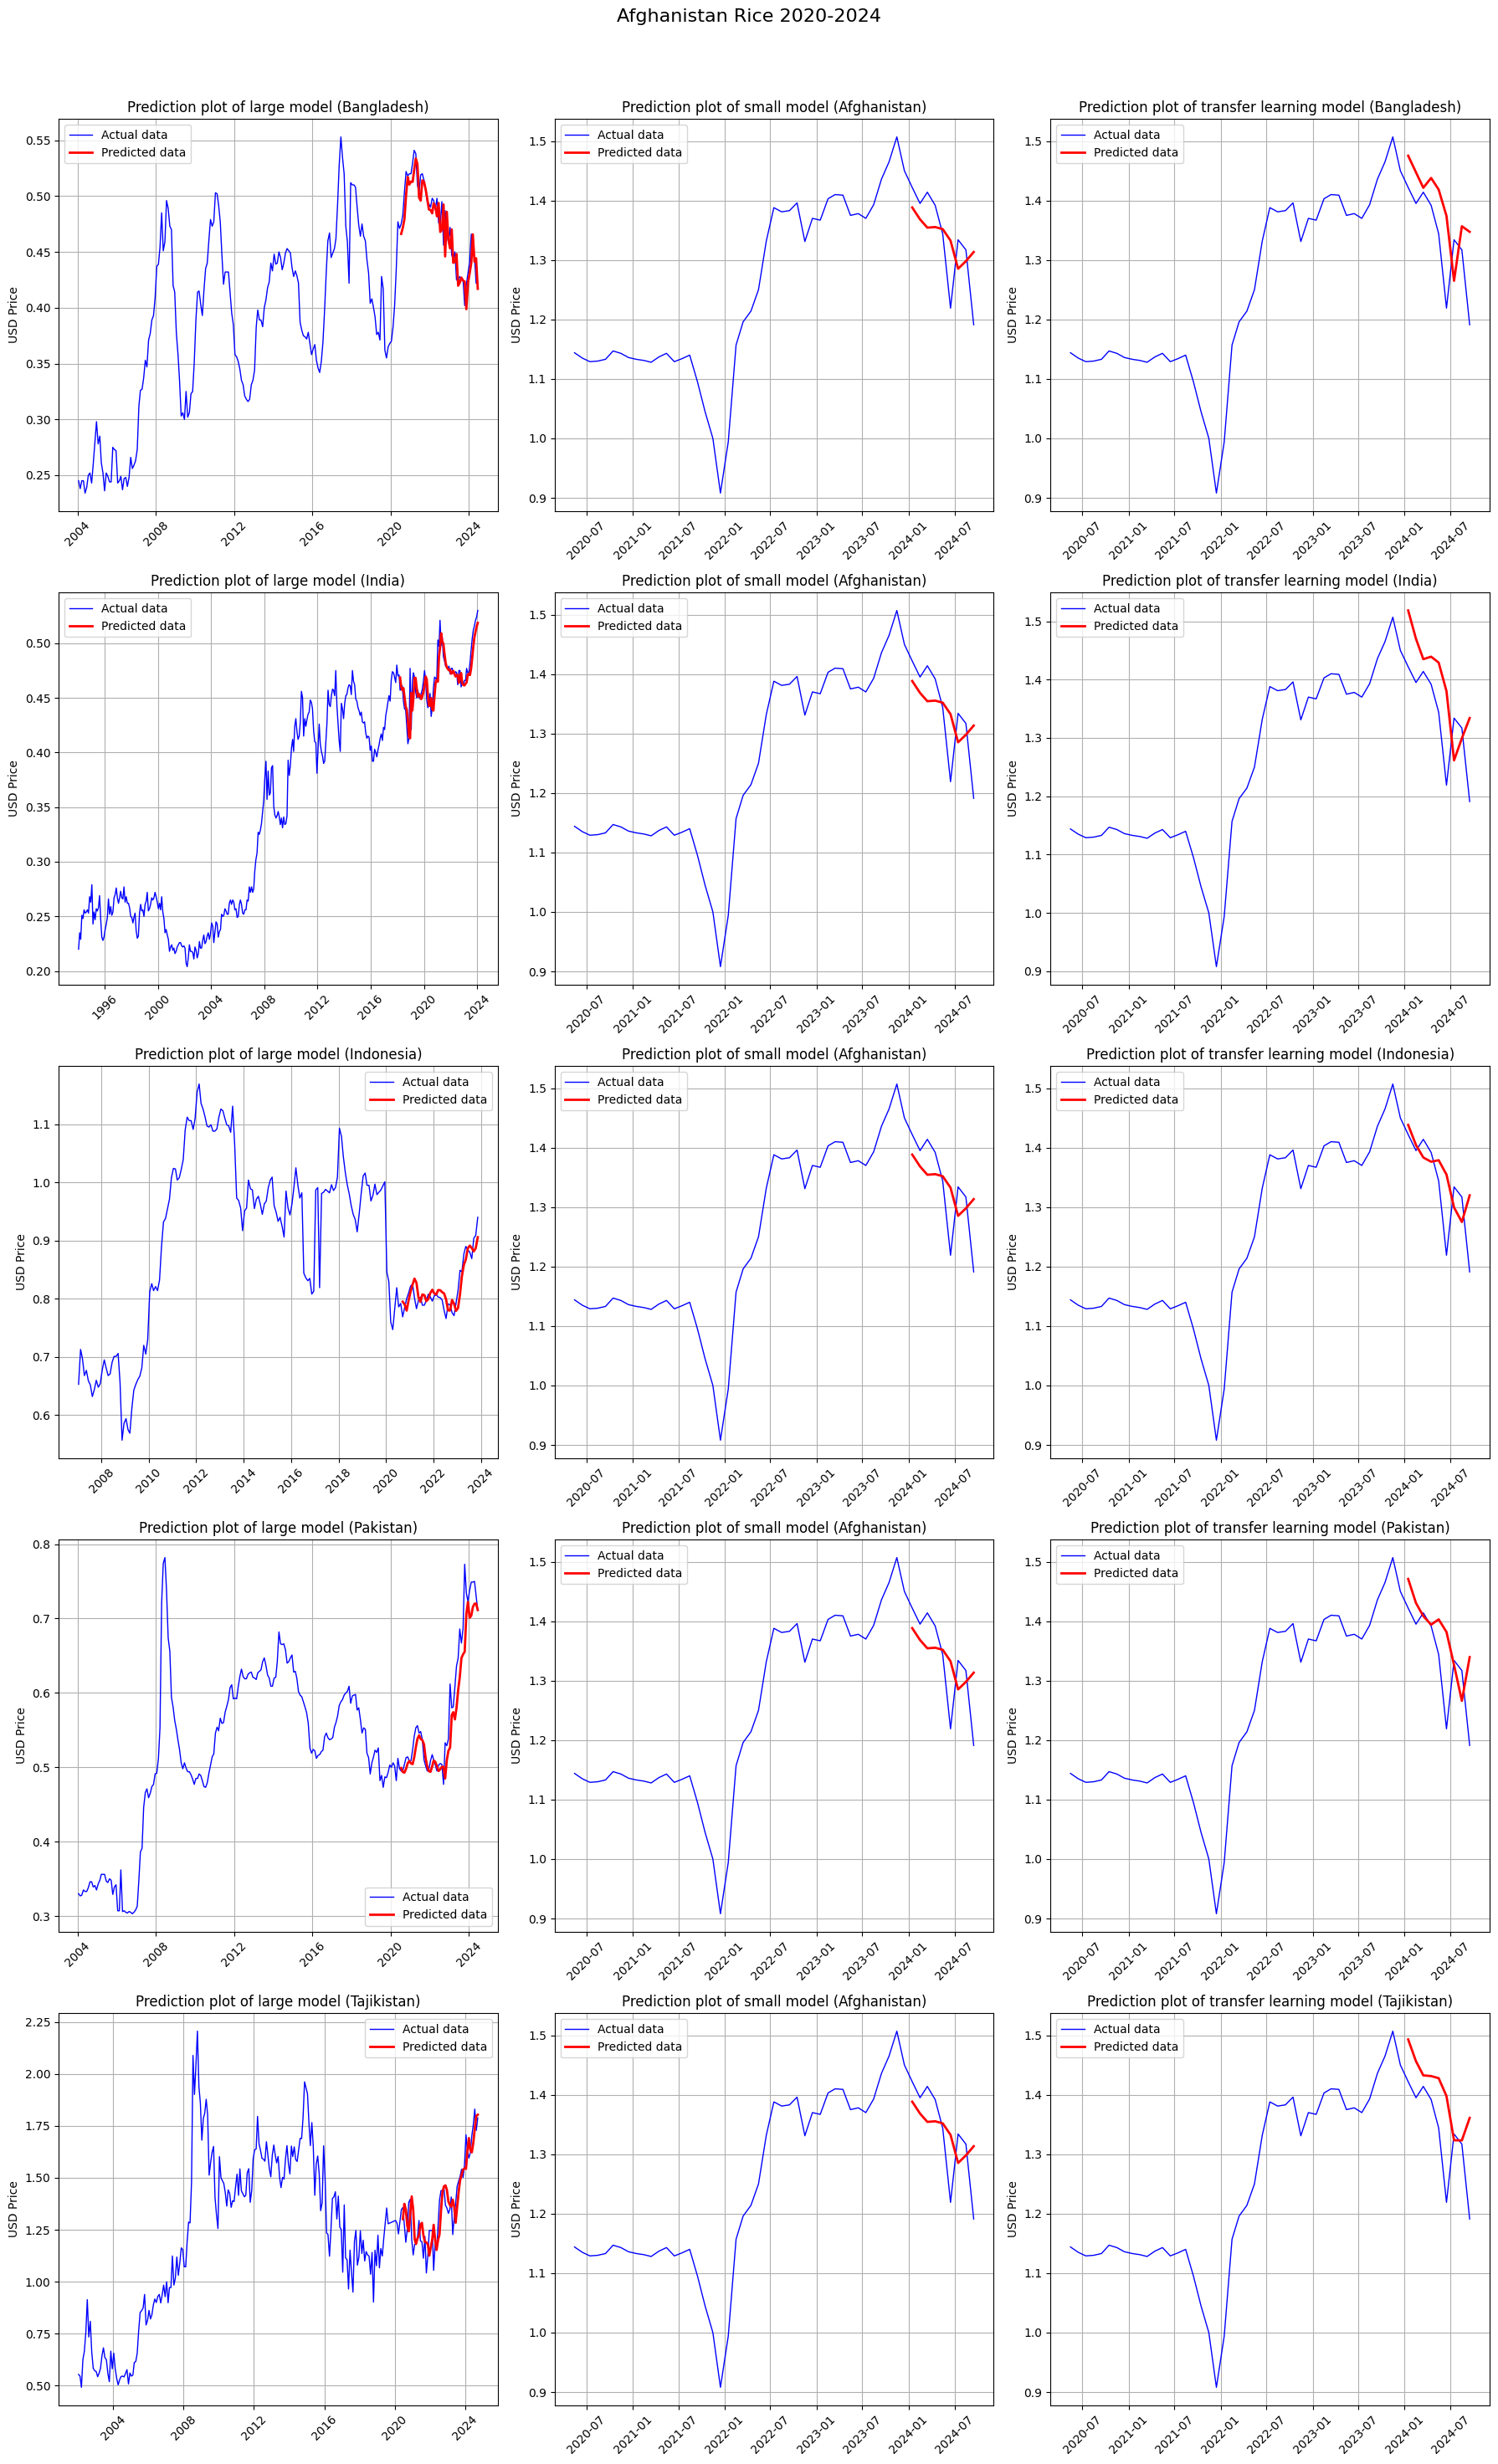

In [40]:
vis.visualize_tl_summary(
    "Afghanistan", large_datasets, commodity, "Afghanistan Rice 2020-2024"
)

# TL Summary Lao

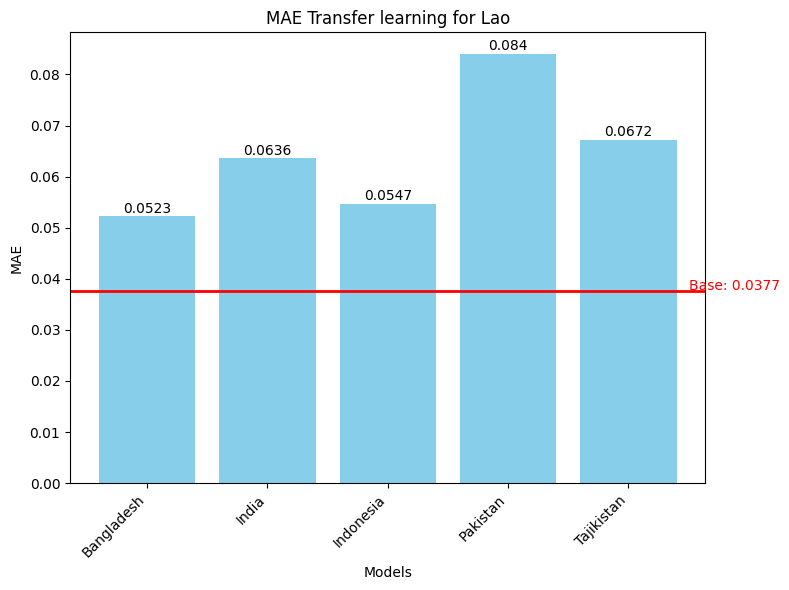

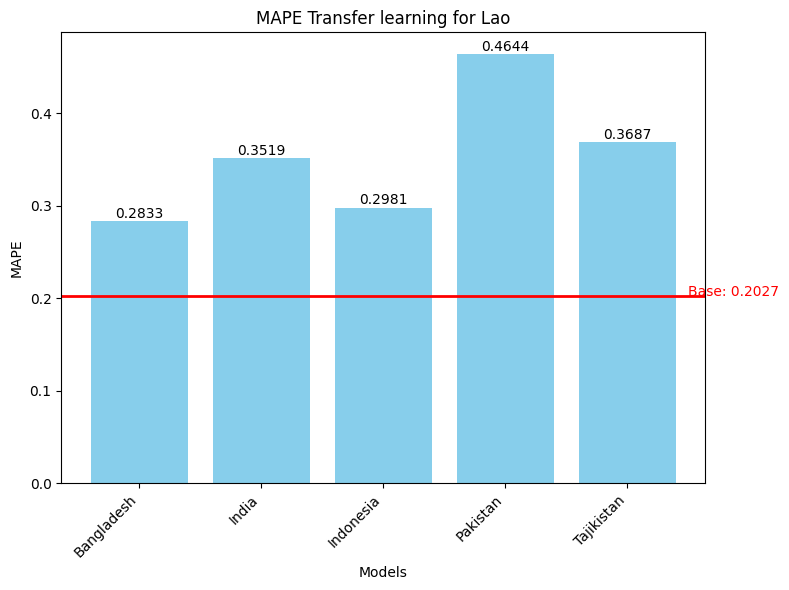

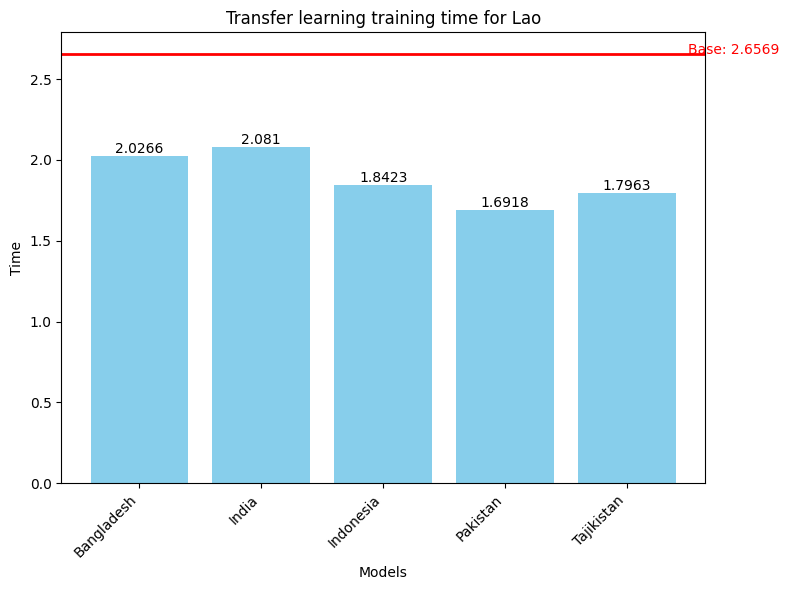

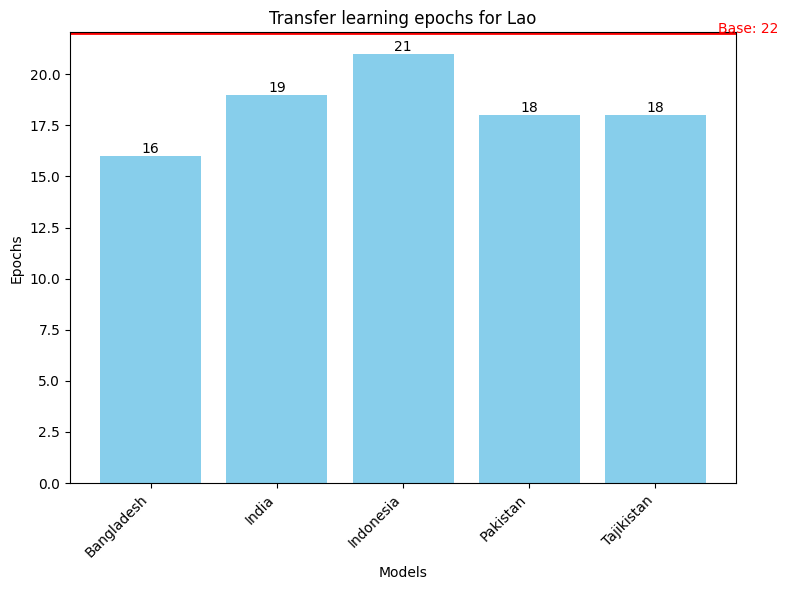

In [56]:
result = tls.get_result(c.get_small_model_results(), "Lao", commodity)
vis.plot_bar_from_array(
    tls.get_tl_metrics("mae", c.get_tl_model_results(), "Lao"),
    large_datasets,
    "MAE Transfer learning for Lao",
    "Models",
    "MAE",
    round(result["evaluation"]["mae"], 4),
)

result = tls.get_result(c.get_small_model_results(), "Lao", commodity)
vis.plot_bar_from_array(
    tls.get_tl_metrics("mape", c.get_tl_model_results(), "Lao"),
    large_datasets,
    "MAPE Transfer learning for Lao",
    "Models",
    "MAPE",
    round(result["evaluation"]["mape"], 4),
)


vis.plot_bar_from_array(
    tls.get_tl_metrics("elapsed_time", c.get_tl_model_results(), "Lao"),
    large_datasets,
    "Transfer learning training time for Lao",
    "Models",
    "Time",
    round(result["evaluation"]["elapsed_time"], 4),
)

vis.plot_bar_from_array(
    tls.get_tl_metrics("epochs", c.get_tl_model_results(), "Lao"),
    large_datasets,
    "Transfer learning epochs for Lao",
    "Models",
    "Epochs",
    round(result["evaluation"]["epochs"], 4),
)


1/1 [==============================] - 0s 142ms/step


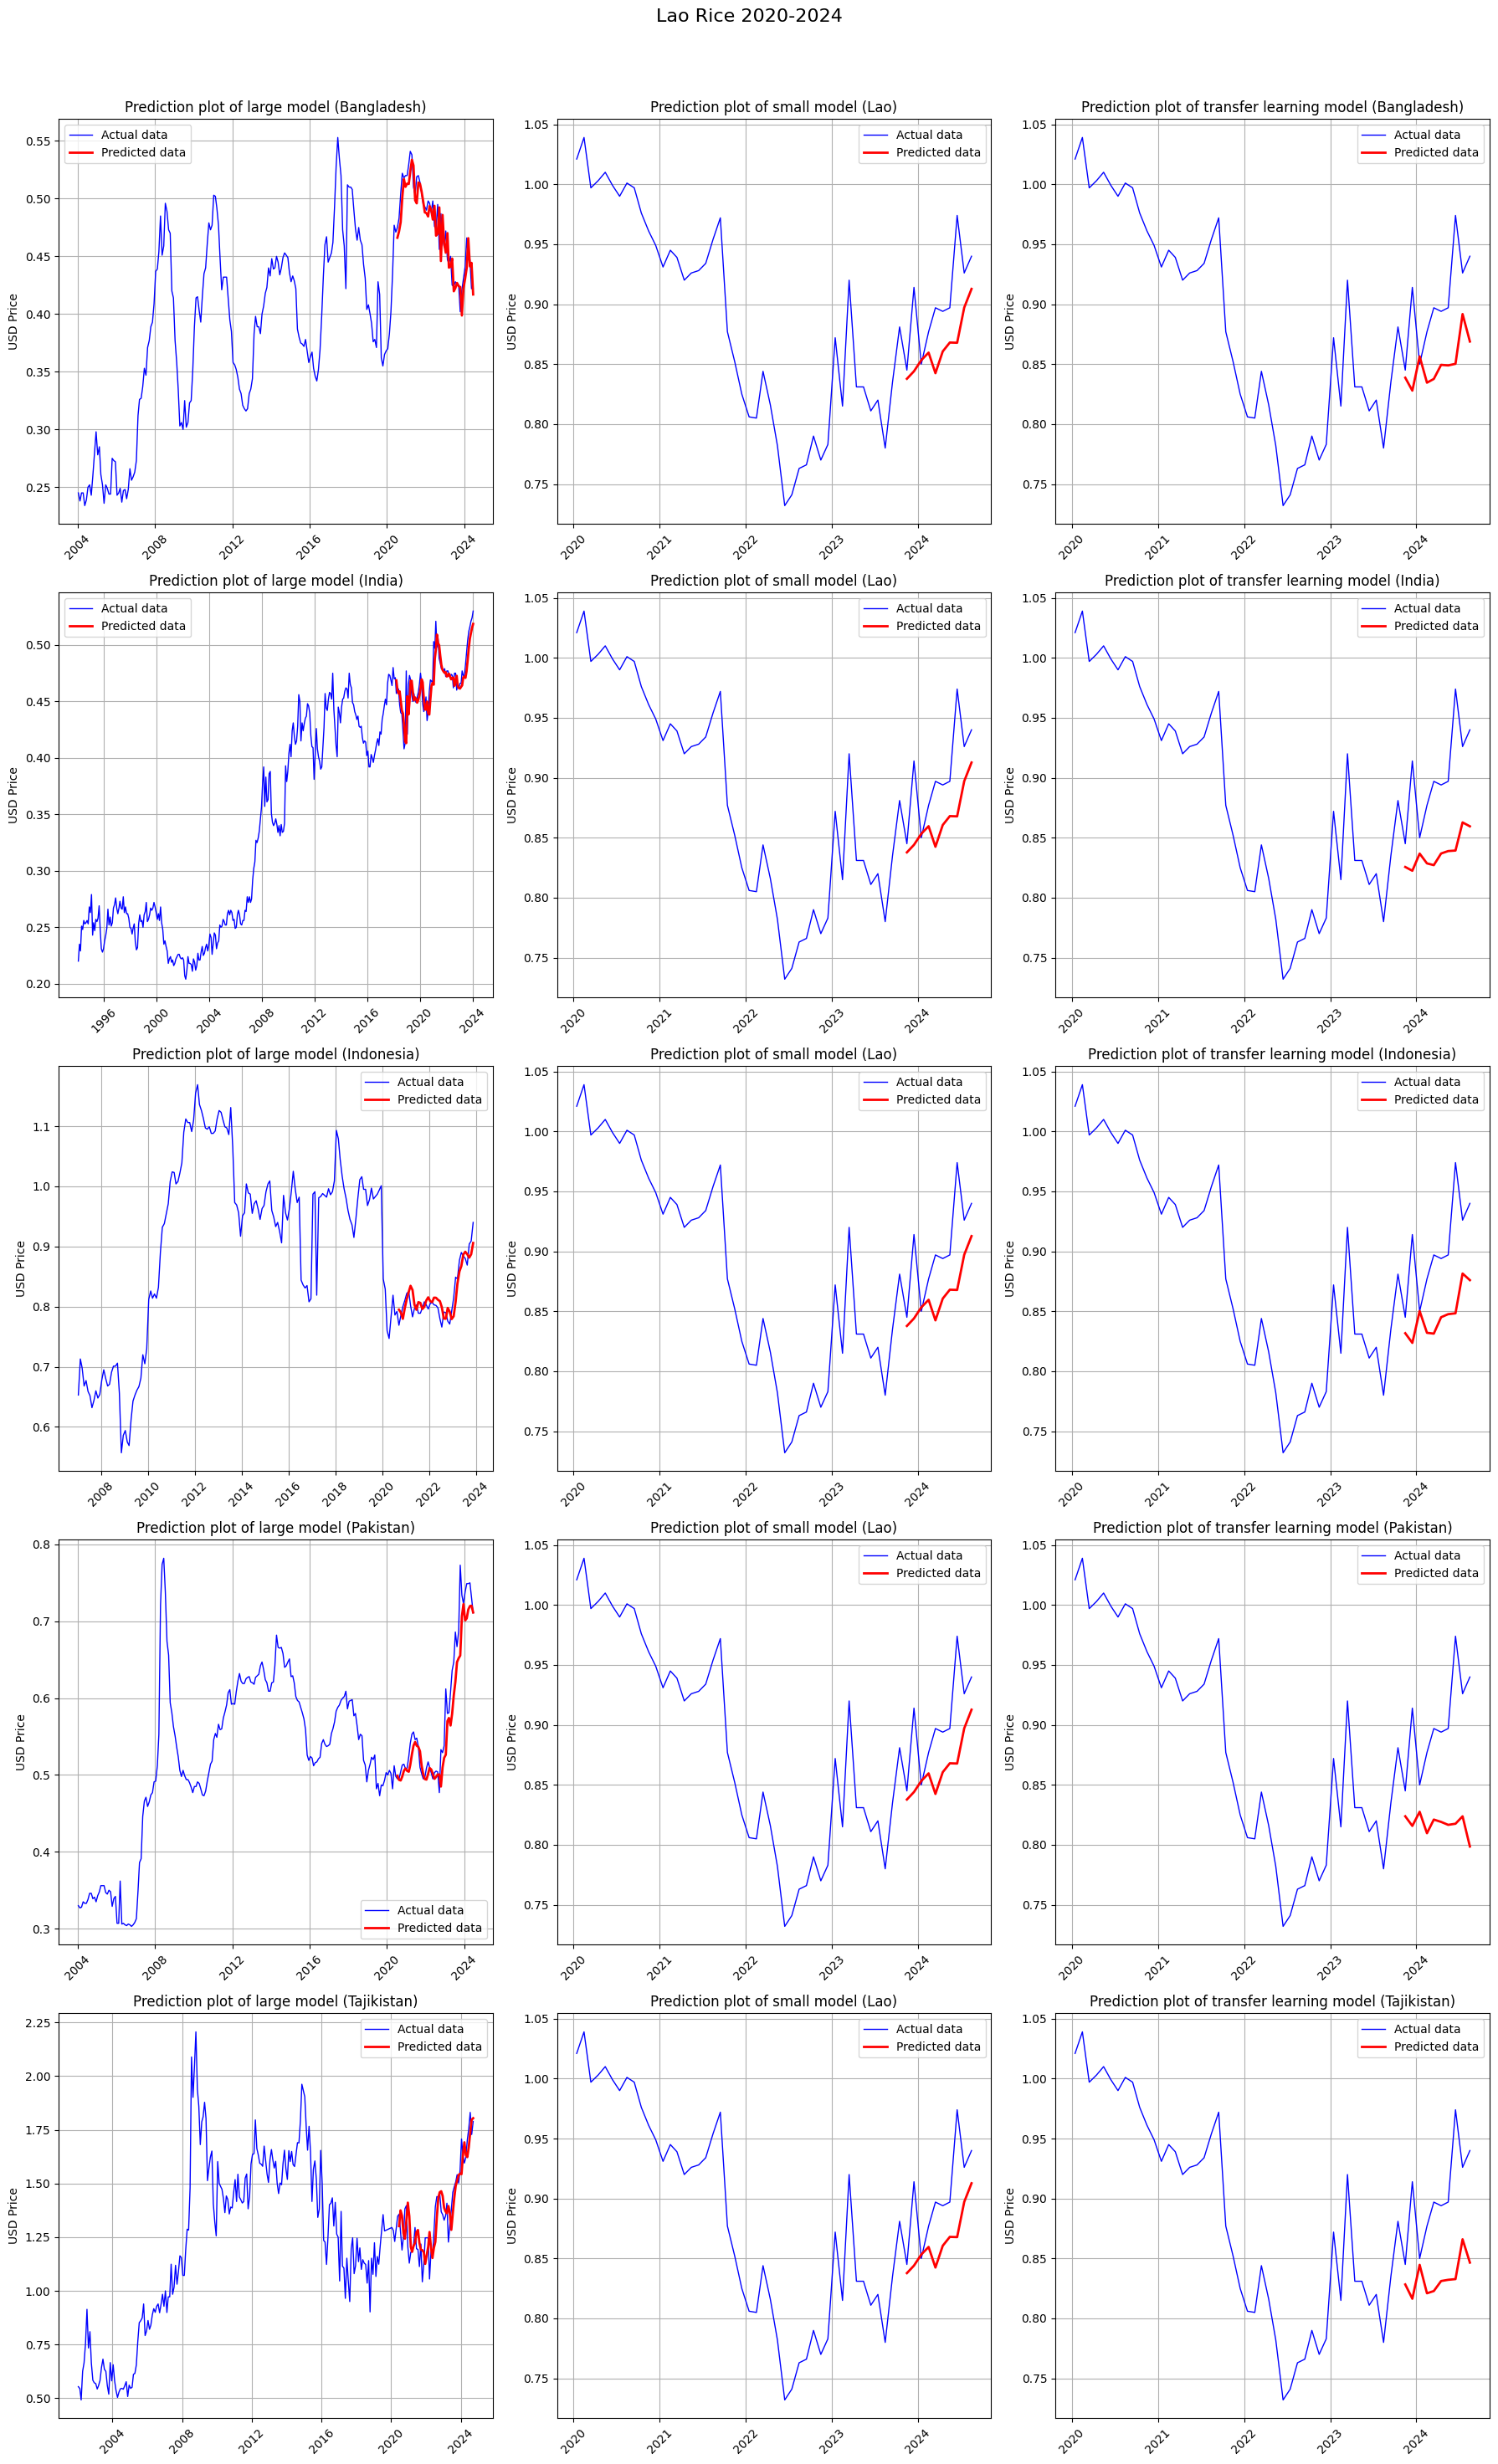

In [13]:
vis.visualize_tl_summary(
    "Lao", large_datasets, commodity, "Lao Rice 2020-2024"
)

# Case proof 

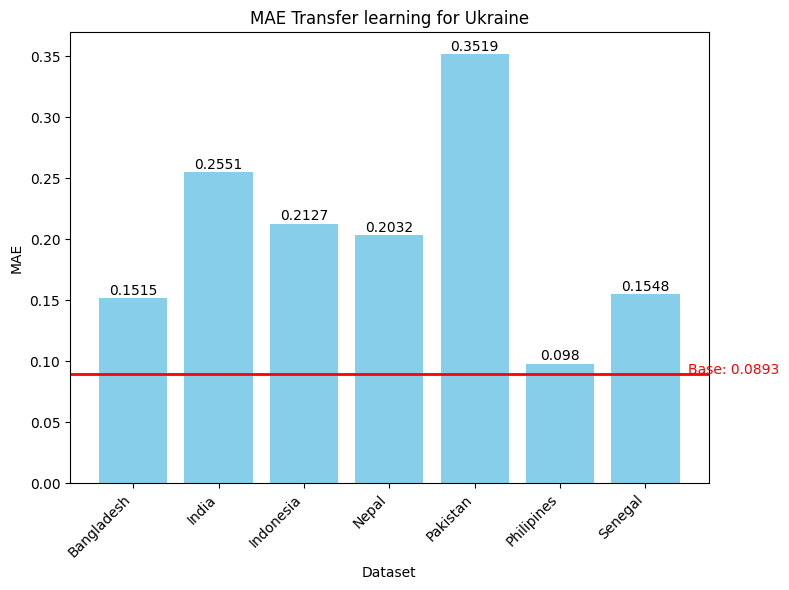

In [71]:
result = tls.get_result(c.get_small_model_results(), 'Ukraine', commodity)
vis.plot_bar_from_array(tls.get_tl_all_maes(c.get_tl_model_results(), 'Ukraine'), large_datasets, 'MAE Transfer learning for Ukraine', 'Dataset', 'MAE', round(result['best_mae'], 4))